Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
Attribute Information:
Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes’, ‘no')


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import scipy.stats as ss


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('bank-additional-full.csv', sep=';')

### Getting an Overview

As a first step of data preparation we have to check what we are actually working with. For this purpose we will use  pandas head(), info(), describe() functions to get an insight about the data. 

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

By using info() function, we can see the types of our features, also we can see what is the shape of the dataset, how many rows and columns we have. Even we can figure out whether there are and missing values.

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


With head() function we can see what are the features names, what they look like. For example, categorical data is saved in text form. That is, instead of using numbers to indicate a category it uses text such as 'housemaid' to indicate a job type. We can also see an 'unknown' in the default column. It means, the value is not missing, but it is set to the text 'unknown'.In addition we can see the shape of the datasate on the left bottom.

In [64]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Describe() function returns istatistical information such as count, mean, std, and quartiles for the numeric features. For example, with this function we can get insight whether the features are skeewed or not, by comparing means and 50% values of features.

### Checking for missing values

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

As we discused before, there are no missing values.

## Visualization the features

#### Let's look at the ratio of whether the client subscribed a term deposit or not

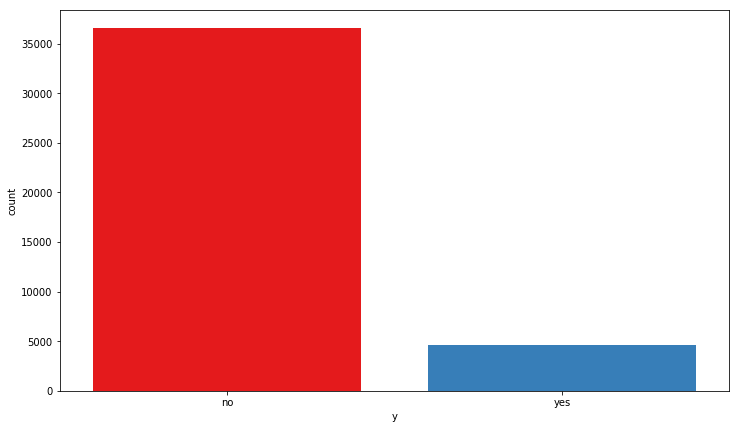

In [70]:
plt.figure(figsize=(12,7))
sns.countplot(x='y', data=data, palette=('Set1'),saturation=3)

In [22]:
pd.DataFrame(data.y.value_counts())

,y
no,36548
yes,4640


As we see there are 36548 'NO' and 4640 'YES', the ratio of YES to NO almost 1:8. We can conclude that our data set is unbalance.

Let's visualize our features correspond to y, to get insight about the relation between independet features and response feature y. To visualize categorical features I'll use seaborn countplot and for continuous features I'll use distplot. I am going to write two functons and use them for visualization.

In [3]:
def categorical_feature_plot(feature):
    plt.figure(figsize=(16,7))
    total = float(len(data))
    sns.set_style('whitegrid')
    ax = sns.countplot(x=feature, hue="y", data=data, palette=('Set1'),
                       order = data[feature].value_counts().index,
                       saturation=3) 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.3f}'.format(height/total),
            ha="center") 

In [4]:
def continuous_feature_plot(feature):
    plt.figure(figsize=(16,7))
#    sns.set(palette=five_thirty_eight)
#    sns.distplot(data[data.y == 'no'][feature],label='no')
    # Draw the yes plot
#    sns.distplot(data[data.y == 'yes'][feature],label='yes')
    # Draw the legend
    sns.set_style('whitegrid')
    g = sns.FacetGrid(data, hue="y",size=6, aspect=2, palette=('Set1'))
    g = g.map(sns.distplot, feature)
    plt.legend()

Ok! Now we are ready to visualize our features to get an insight about the relaition between our independent feaetures and response feature.

### Job

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


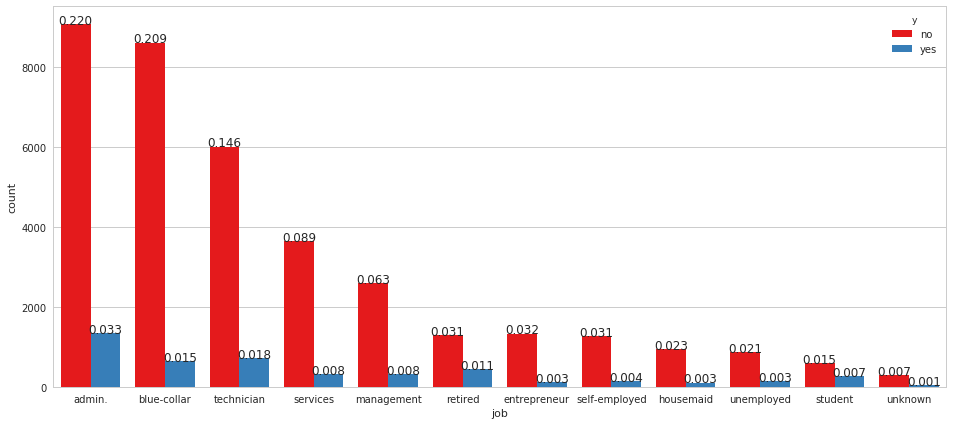

In [149]:
categorical_feature_plot('job')

As we see from the plot, majority of people are admin and blue-collar, they are almost half of the job groups. Retired people and Students have higher yes ratio. The ratio of students is almost 50% and retired people is almost 33%. Both of the features are corrleated with age. In addition, we see that very little people job defined as unknown.

### Age

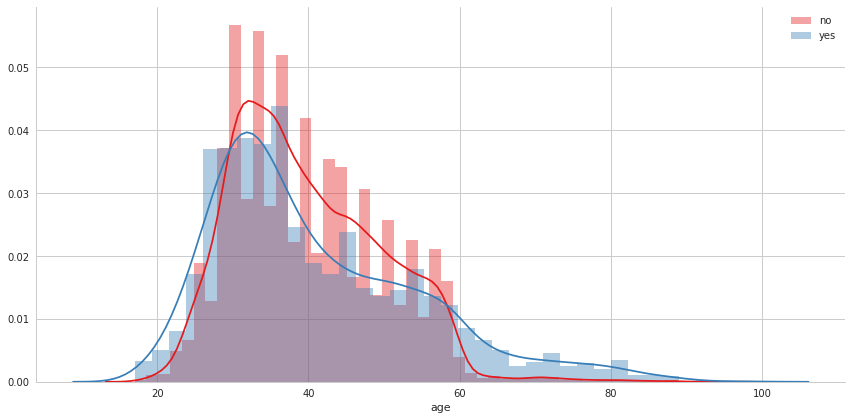

In [133]:
continuous_feature_plot('age')

According to this plot over a certain age, around 60 a lot of people subscribed! Between 30 and 60 number of unsubscribed people higher than subscribed ones, and below 30 vice versa. So we can divide age to three groups. Young, age less than 30, middle, age between 30 and 60, and old, age higher than 60.

In [3]:
data['old_age'] = np.where(data['age'] >= 60, 1,0)
# Create mid age people group
data['mid_age'] = np.where((data['age'] <= 60) & (data['age'] >= 30), 1,0)
# Create young people group
data['young_age'] = np.where(data['age'] <= 30, 1,0)

Now we can remove age column.

In [4]:
data.drop('age', axis=1, inplace=True)

### Marital

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


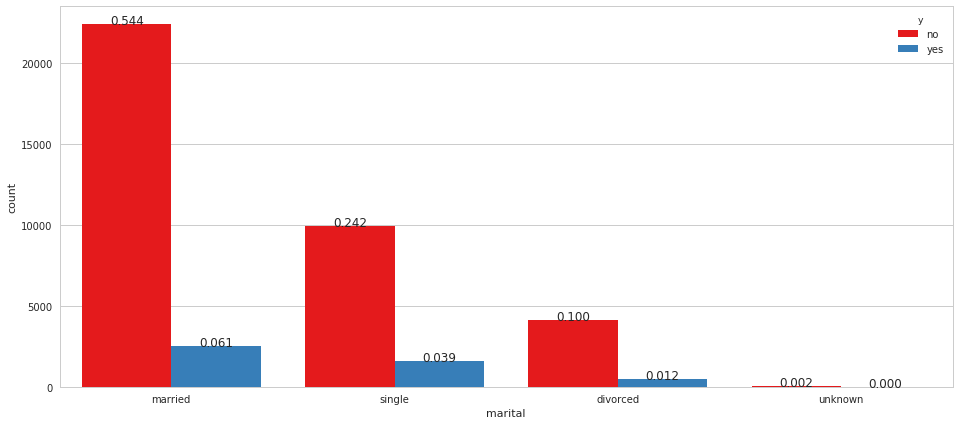

In [153]:
categorical_feature_plot('marital')

The majority (60%) of people are married. While there are some unknowns, they make up for a tiny fraction, so, we will just treat it as its own category. Accorfing to this plot Singles have the higher Yes No ratio.

### Education

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


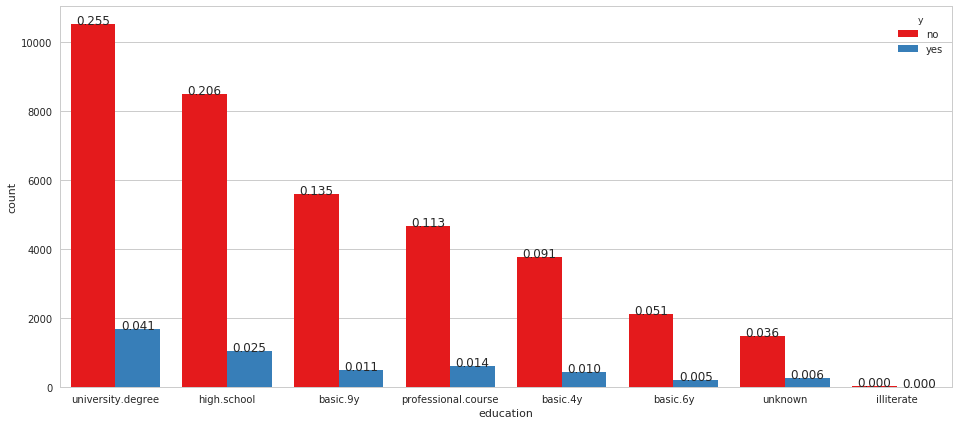

In [154]:
categorical_feature_plot('education')

For education feature the majorty is university degree (30%). There are some unknown education level as well, and very little illiterate. University degree has the highest Yes:No ratio.

### Housing

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


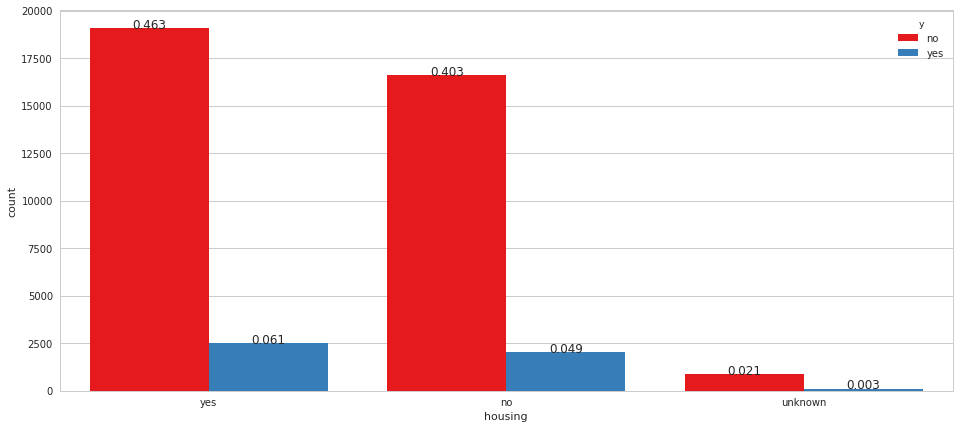

In [162]:
categorical_feature_plot('housing')

For this feature Yes:No ratio of housing and no-housing almost same. again here we have some unknown.

### Loan

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


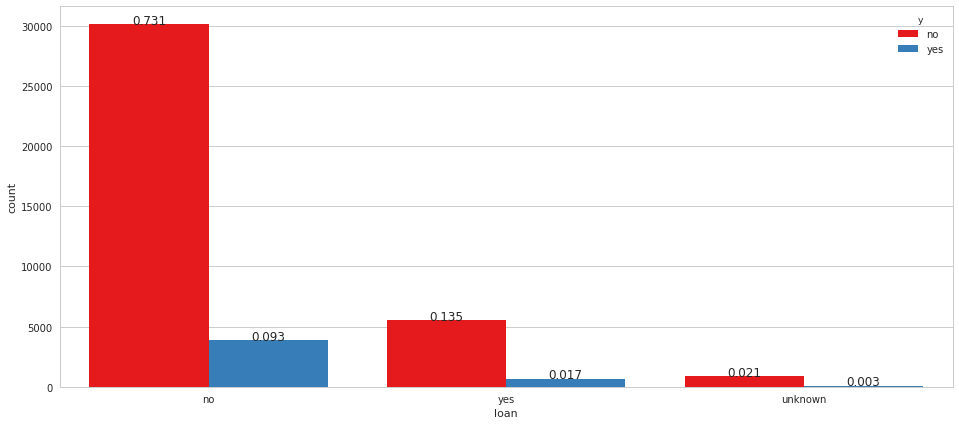

In [167]:
categorical_feature_plot('loan')

The majority of pepople do not have loan (84%). The Yes:No ratio of peopole who have loan and do not have loan almost same, and again here we have some unknown.

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


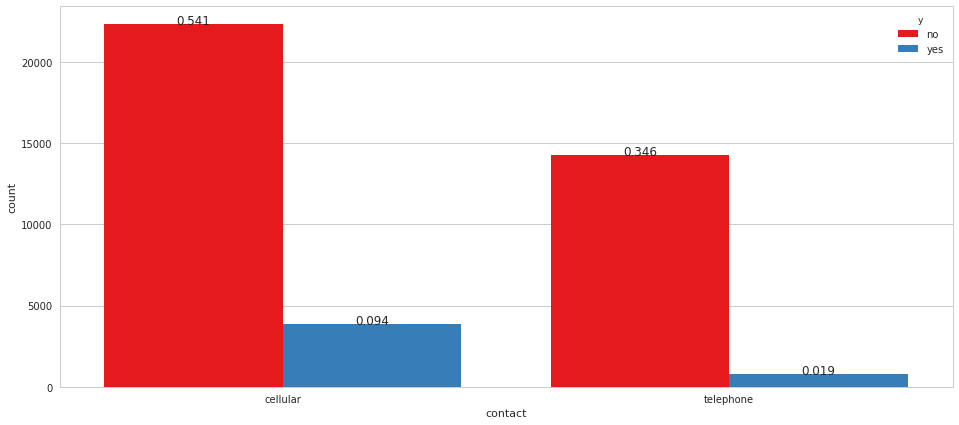

In [168]:
categorical_feature_plot('contact')

People have mostly cellular phone rather than land line. Cellular people's Yes:No ratio is higher. 

### Month

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


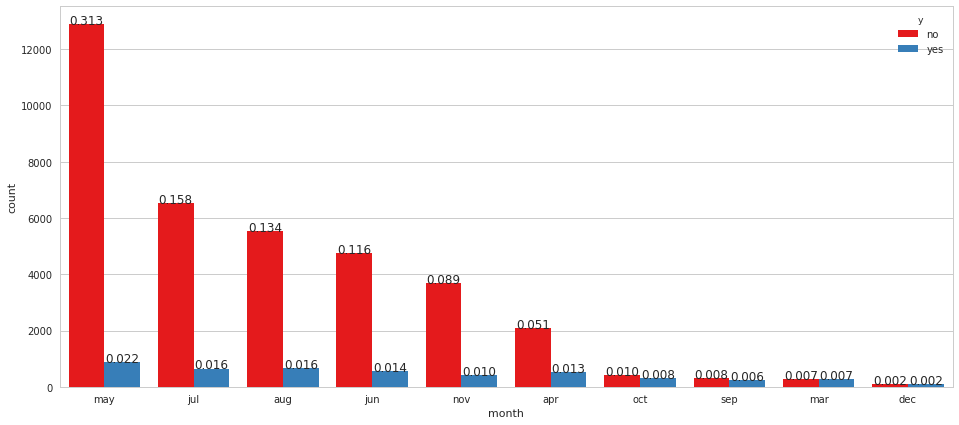

In [170]:
categorical_feature_plot('month')

Here we see that people mostly contacted in spring and summer time. However, Fall and Winter month's Yes:No ratio higher than Spring and summer time.  

### Conact Day of Week

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


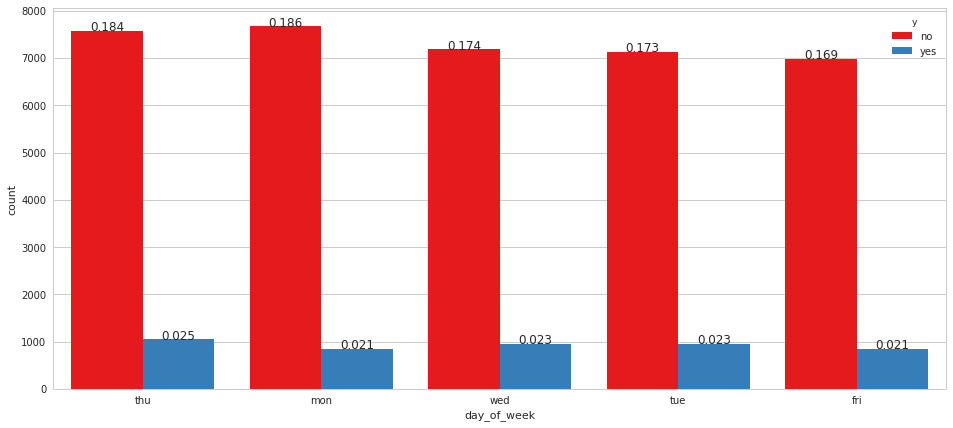

In [171]:
categorical_feature_plot('day_of_week')

This plot illustrates that mostly people called on Mondays and Thurdays. Other days call rate and Yes:No ratio almost same. The highest Yes:No ratio belongs to Mondays, and second one is Thurdays.

### Duration

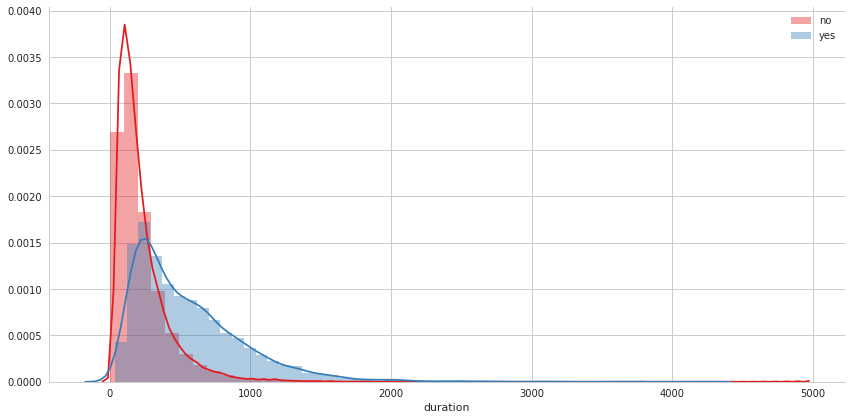

In [172]:
continuous_feature_plot('duration')

We can see that the duration of the call has correlation with the outcome. However, once the duration of the call is known, the outcome is also known, and we can not estimate the duration of the call in advance. That's why, we can not use this feature in our model. We need to drop this feature.

In [5]:
data.drop('duration', axis=1, inplace=True)

### Campaign

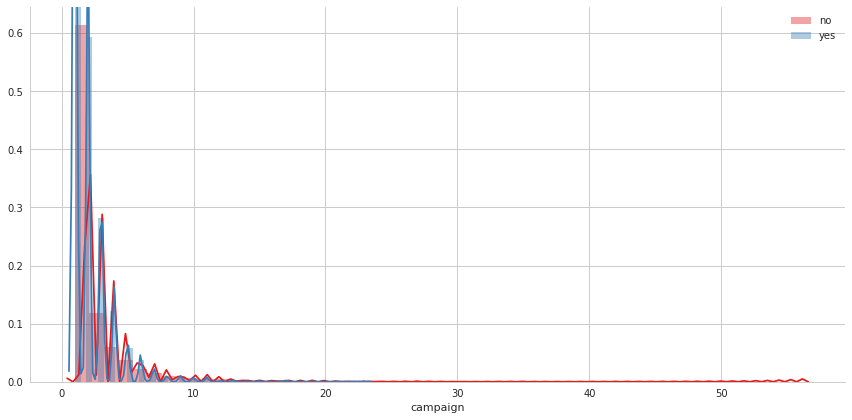

In [176]:
continuous_feature_plot('campaign')

This feature means that number of contacts performed during this campaign and for this client.

This plot little bit hard to read. I'll plot it again for less than 10 contact

In [180]:
modified=data[data<10]

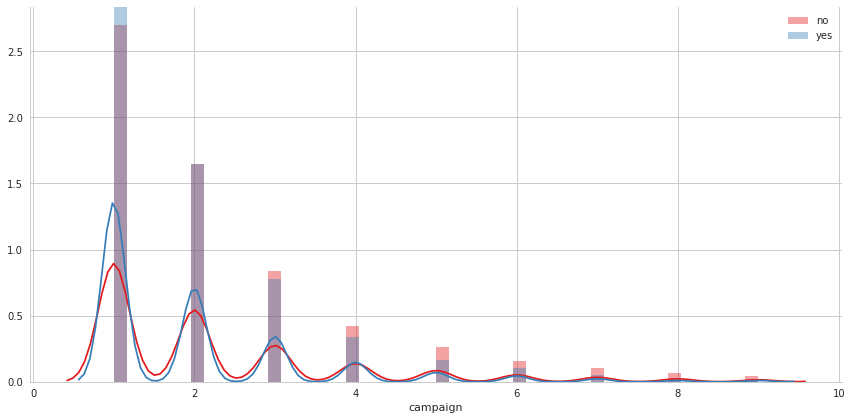

In [184]:
sns.set_style('whitegrid')
g = sns.FacetGrid(modified, hue="y",size=6, aspect=2, palette=('Set1'))
g = g.map(sns.distplot, 'campaign')
plt.legend()

Now we see that there is negative correlation between the number of contacts and the likely hood of a yes, the nore campaign number the less Yes:No ratio. 

In [186]:
pd.DataFrame(data.campaign.value_counts())

,campaign
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283
10,225


Since there is a very long tail, and almost 99% of the data in less than 15 number of contact, we will clip the value to 15, to prevent any distortion.

In [6]:
data['campaign'] = data['campaign'].clip(upper = 15)

In [190]:
data.describe()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,old_age,mid_age,young_age
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,2.509882,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.028965,0.840269,0.179251
std,2.352013,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.167709,0.366361,0.383567
min,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000
25%,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,1.000000,0.000000
50%,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000,0.000000
75%,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000,0.000000
max,15.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000


### Pdays

This feature means number of days that passed since the customer was last contacted. 999 means they where not contacted before.Since large majority is 999, I can not drop these data, instead I'll fill these ones with the mean of the rest of the data.

In [7]:
pdays_mean=data[data['pdays'] < 999]['pdays'].mean()
data['pdays'] = np.where(data['pdays'] == 999, pdays_mean,data['pdays'])

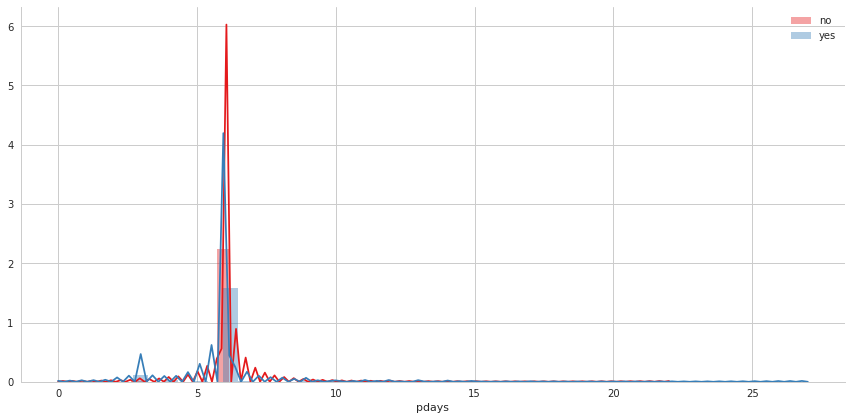

In [194]:
continuous_feature_plot('pdays')

### Previous

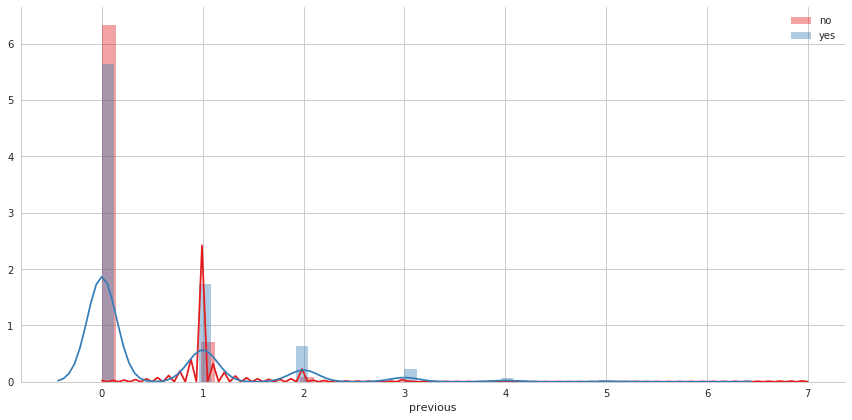

In [195]:
continuous_feature_plot('previous')

This feature means the number of contacts excluding the last one. It shows that the more contact the higher Yes:No ratio. 

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


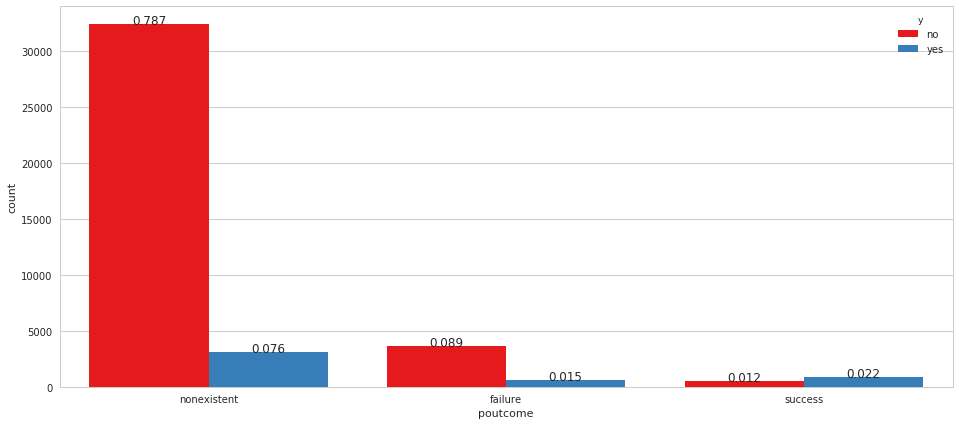

In [197]:
categorical_feature_plot('poutcome')

According to this plot customers who where not contacted before seem to reject mostly subscribing. The customers that said yes before are more likely to say yes again. 14% of the customers who said no before, say yes this time. 

## Economic indicators

### Employment variation rate

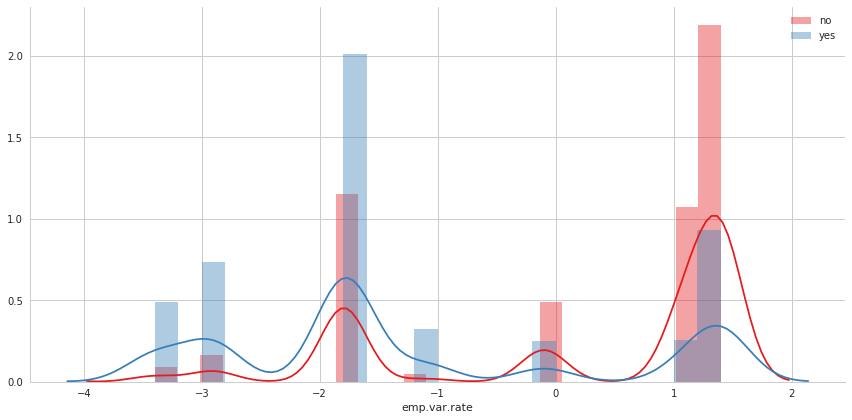

In [198]:
continuous_feature_plot('emp.var.rate')

It is clear from the plot that, when employment variation rate less than 0, mostly people subscribe the term deposit, whereas when the employment variation rate greater than or equal to zero, people most likely unsubscribe.

### Consumer price index

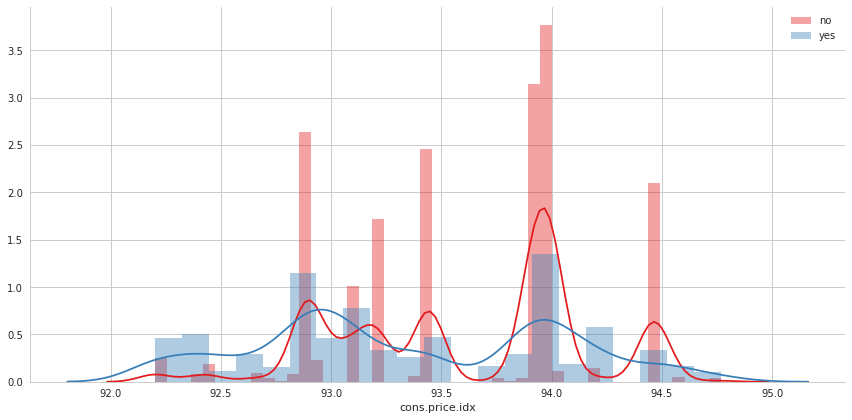

In [199]:
continuous_feature_plot('cons.price.idx')

This plot indicates that the lower consumer price index the more subscriber and vice versa.

### Consumer confidence index

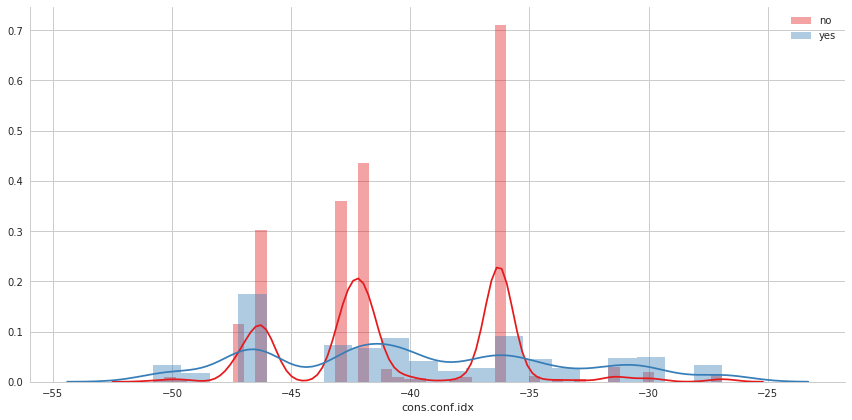

In [200]:
continuous_feature_plot('cons.conf.idx')

### 3 month euribor

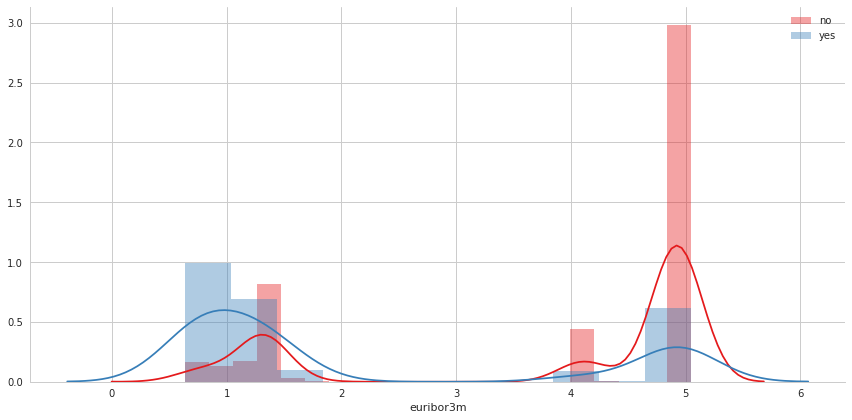

In [202]:
continuous_feature_plot('euribor3m')

We can see that the higher 3 month euribor the higher unsubscriber.

### Employment number

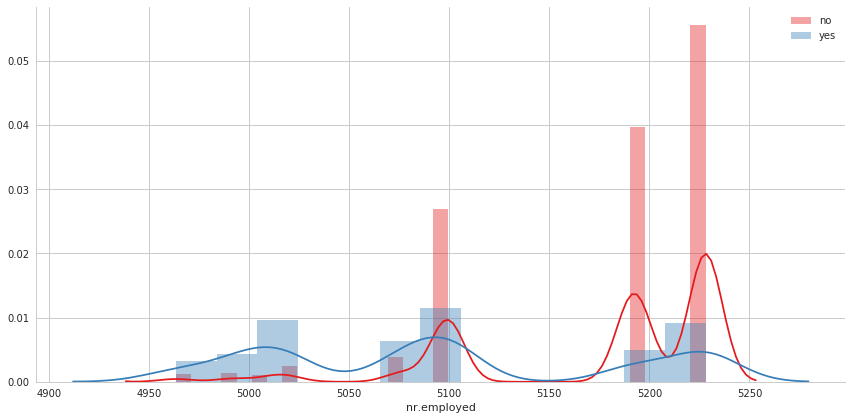

In [203]:
continuous_feature_plot('nr.employed')

Again it is clear that the more employment number the higher unsubscriber and vice versa.

We visualized the data. Now it is time to dive deeper for statistical inferences.

### Spliting Data

To prevent any data contamination we are going to split the data into train, validation and test set now. I will use training data to train machine learning model by pairing the input with expected output, validation data for tuning and optimizing hyperparametes of the model and test data to assess the performance of trained model.

In [9]:
from sklearn.model_selection import train_test_split

In [17]:
y = data['y']
X = data.drop('y',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y, random_state=42)

For statistical analysis I will concatinate X_train and y_train and create a train dataset, X_val and y_val to create validation dataset, and X_test, y_test to create test dataset.

In [23]:
train=pd.concat([X_train, y_train], axis=1)

In [17]:
#validation=pd.concat([X_val, y_val], axis=1)

In [24]:
test=pd.concat([X_test, y_test], axis=1)

### ANOVA test

To understand the relaitionship between numeric independet variables and response variable we use ANOVA test. For this purpose I will create a sub-dataset, which is including just numerical independent variables 

In [30]:
m=[]
for feature in train:
    if (train[feature].dtype == 'int64') | (train[feature].dtype == 'float64'):
        m.append(feature)  

In [31]:
# kolon isimlerindeki verileri degişkene alıyoruz.
numeric_data=train.loc[:, m]
numeric_data.shape

(32950, 11)

29238

In [33]:
from scipy import stats  

f=[]
p=[]
grps= pd.unique(train.y.values)
k=len(pd.unique(train.y))
N=len(train.values)
n= train.groupby('y').size()[0]
for i in range(0, len(m)):
    
    d_data= {grp:train[m[i]][train.y == grp] for grp in grps}
    f_val, p_val = stats.f_oneway(d_data['no'],d_data['yes']) 
 
    f.append(f_val)
    p.append(p_val)


In [35]:
anova_df=pd.DataFrame(f,index=m, columns=['F-value'])
anova_df['p-value']=p

anova_df.sort_values(['F-value', 'p-value'], ascending = [False, True])

,F-value,p-value
nr.employed,4591.467371,0.000000e+00
euribor3m,3334.921621,0.000000e+00
emp.var.rate,3110.163775,0.000000e+00
previous,1836.226549,0.000000e+00
old_age,805.069729,5.453757e-175
cons.price.idx,588.964243,5.723661e-129
mid_age,544.297619,2.040335e-119
campaign,156.954361,6.325186e-36
young_age,124.745651,6.520897e-29
cons.conf.idx,101.165877,9.155033e-24


According to ANOVA test pdays is not statistically significant, so I can remove this feature from my dataset when I'm create machine learning model.

### Feature Selection with SelecetKBest

In [36]:
from sklearn.preprocessing import LabelEncoder

y=train.y
le = LabelEncoder()
y=le.fit_transform(y)

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

selector = SelectKBest(f_classif, k = 11)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(numeric_data, y)
#n = numeric_data.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
p_val= selector.pvalues_[selector.get_support()]
values = list(zip( scores,p_val))

#anova_df=pd.DataFrame(f,index=d, columns=['F-value'])
ns_df = pd.DataFrame(data = values, columns=['F-value','p-value'],index=m)
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F-value'], ascending = False)
ns_df_sorted

,F-value,p-value
nr.employed,4591.467355,0.000000e+00
euribor3m,3334.921621,0.000000e+00
emp.var.rate,3110.163775,0.000000e+00
previous,1836.226549,0.000000e+00
old_age,805.069729,5.453757e-175
cons.price.idx,588.964242,5.723662e-129
mid_age,544.297619,2.040335e-119
campaign,156.954361,6.325186e-36
young_age,124.745651,6.520897e-29
cons.conf.idx,101.165877,9.155033e-24


Select KBest featureselection algorithm confirms our ANOVA test and we got same results

### Checking Correlation Among Continuous Features 

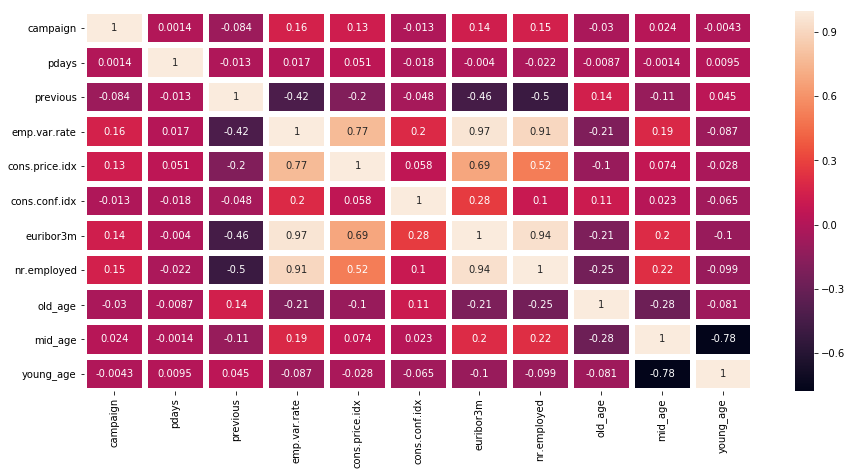

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(numeric_data.corr(),linewidths=5, annot=True)

As we see from correlation heatmap, there is high correlation among **euribor3m**, **emp.var.rate**,  **nr.employed**, and **cons.price.idx**.

It means we can use just one of these four feature in our model to decrease complexity. According to ANOVA test the highest F-value belong to **nr.employed** features, therefore I will use this feature and discard the other three ones.

### Chi-square Test

In our data set we have some categorical independent features and also our dependent feature is categoric. In order to analyze relationship between categoric variables I will use Chi-square test.

I need to seperate categorical independent variables. I wrote the following script to get these variables.

In [40]:
c=[]
for feature in train:
    if (train[feature].dtype == 'object'):
        c.append(feature) 

In [41]:
l=[]
for feature in c:
    confusion_matrix = pd.crosstab(data[feature], data.y)
    conti=ss.chi2_contingency(confusion_matrix.values)
    l.append(conti[1])

In [42]:
chi_test=pd.DataFrame(l,index=c, columns=['p-values'])

chi_sorted = chi_test.sort_values(['p-values'], ascending = False)
chi_sorted

,p-values
loan,5.786753e-01
housing,5.829448e-02
day_of_week,2.958482e-05
marital,2.068015e-26
education,3.305189e-38
default,5.161958e-89
contact,1.525986e-189
job,4.189763e-199
month,0.000000e+00
poutcome,0.000000e+00


Since housing and loan p values greater than 0.05 (significance level), they are not statistically significant according to Chi-square test. Therefore, I can discard these variables on my machine learning model.

Now I'm going to develop two models. In the first model I will use all features, in the second model I will extract the features which are not statistically significant and multicolinear.

## Model 1

In this model I will use all the features in my dataset

In [106]:
train1=train.copy()
y1_train = train1['y']
X1_train = train1.drop('y',axis=1)

test1=test.copy()
y1_test = test1['y']
X1_test = test1.drop('y',axis=1)

### Label encoding the categorical features¶
In order to create machine learning model we have to convert our string features to number, because the algorithms can only understand the numeric values, unless we are working with natural language processing. Therefore, we are going to convert our features to numeric values by using Label encoder function from sklearn library.

For this particular project we are going to use tree based machine learning algorithms, hence we do not need to use one hot encoder or dummy variable not to increase the dimensionality of the data set. Let's move forward.

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [162]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le1 = LabelEncoder()
ohe1= OneHotEncoder()


col=train1.columns
new=pd.DataFrame()
for feature in col:
    if train1[feature].dtype == 'object':
        
        train1[feature]=le1.fit_transform(train1[feature])
        dddddd=pd.get_dummies(train1[feature],drop_first=True)
        new=pd.concat([new, dddddd], axis=1)


'''
col=a.columns

for item in col:
    a[item]=le1.fit_transform(a[item])
    dddddd=pd.get_dummies(a[item],drop_first=True)
    
#    feat_label=list(le1.classes_)
#    bbbbb=pd.DataFrame(aaaaa,columns=feat_label)
    
    aaaaa=pd.concat([aaaaa, dddddd], axis=1)        
        
        #tra= integer_encoded.reshape(len(integer_encoded), 1)
        #
        
        #train1[feature] = ohe1.fit_transform(train1[feature])
        
#for feature in test1:
#    if test1[feature].dtype == 'object':
#        le1.fit(test1[feature])
#        test1[feature]=le1.transform(test1[feature])
#        test1[feature] = test1[feature].astype('category')
#        test1[feature] = ohe1.fit_transform(test1[feature])

'''

"\n\nnew_train=pd.DataFrame()\nfor feature in train1:\n    if train1[feature].dtype == 'object':\n        \n        train1[feature]=le1.fit_transform(train1[feature])\n        train1[feature] = train1[feature].astype('category')\n        \n        dummy=pd.get_dummies(train1[feature],drop_first=True)\n        new_train=pd.concat([new_train, dummy], axis=1) \n\n        \n        a[item]=le1.fit_transform(a[item])\n    dddddd=pd.get_dummies(a[item],drop_first=True)\n    \n#    feat_label=list(le1.classes_)\n#    bbbbb=pd.DataFrame(aaaaa,columns=feat_label)\n    \n    aaaaa=pd.concat([aaaaa, dddddd], axis=1)\n\n################\n\ncol=a.columns\n\nfor item in col:\n    a[item]=le1.fit_transform(a[item])\n    dddddd=pd.get_dummies(a[item],drop_first=True)\n    \n#    feat_label=list(le1.classes_)\n#    bbbbb=pd.DataFrame(aaaaa,columns=feat_label)\n    \n    aaaaa=pd.concat([aaaaa, dddddd], axis=1)        \n        \n        #tra= integer_encoded.reshape(len(integer_encoded), 1)\n        #\

In [193]:
#for feature in train1:
#    if train1[feature].dtype == 'object':
#        #le1.fit(train1[feature])
#        train1[feature]=le1.fit_transform(train1[feature])


# BASARILI

a=X_train[c[:-1]]
aaaaa=pd.DataFrame()
for item in c[:-1]:
    a[item]=le1.fit_transform(a[item])
    dddddd=pd.get_dummies(a[item],drop_first=True)  
    aaaaa=pd.concat([aaaaa, dddddd], axis=1)

In [197]:
for feature in test1:
    if test1[feature].dtype == 'object':
        le1.fit(test1[feature])
        test1[feature] = le1.transform(test1[feature])
#        test1[feature] = test1[feature].astype('category')
        test1[feature] = ohe1.transform(test1[feature])


ValueError: Expected 2D array, got 1D array instead:
array=[6. 6. 5. ... 3. 1. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [187]:
a.poutcome.nunique()

3

In [188]:
11+3+7+2+2+2+1+9+4+2

43

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf1 = RandomForestClassifier(max_depth=15,n_estimators=500, min_samples_leaf=50,\
                                  min_samples_split=100, random_state=101)

rf1.fit(X1_train,y1_train)

pred1=rf1.predict(X1_test)

## Model 2

This is my reduced model. I am discarding the features which are not important for my model acording to statistical test's results.

In [198]:
train2=train.copy()

discarded_features=['pdays','housing','loan','euribor3m','cons.price.idx','emp.var.rate']

for feature in discarded_features:
    train2.drop(feature, axis=1, inplace=True)
    
y2_train = train2['y']
X2_train = train2.drop('y',axis=1)

In [199]:
test2=test.copy()

for feature in discarded_features:
    test2.drop(feature, axis=1, inplace=True)

y2_test = test2['y']
X2_test = test2.drop('y',axis=1)

'''
X2_test.drop('pdays', axis=1, inplace=True)
X2_test.drop('housing', axis=1, inplace=True)
X2_test.drop('loan', axis=1, inplace=True)
X2_test.drop('euribor3m', axis=1, inplace=True)
X2_test.drop('cons.price.idx', axis=1, inplace=True)
X2_test.drop('emp.var.rate', axis=1, inplace=True)


y2_test = y1_test.copy()
X2_test = X1_test.copy()
'''

"\nX2_test.drop('pdays', axis=1, inplace=True)\nX2_test.drop('housing', axis=1, inplace=True)\nX2_test.drop('loan', axis=1, inplace=True)\nX2_test.drop('euribor3m', axis=1, inplace=True)\nX2_test.drop('cons.price.idx', axis=1, inplace=True)\nX2_test.drop('emp.var.rate', axis=1, inplace=True)\n\n\ny2_test = y1_test.copy()\nX2_test = X1_test.copy()\n"

In [ ]:
""""aa=tt.copy()

aa.drop('pdays', axis=1, inplace=True)
aa.drop('housing', axis=1, inplace=True)
aa.drop('loan', axis=1, inplace=True)
aa.drop('euribor3m', axis=1, inplace=True)
aa.drop('cons.price.idx', axis=1, inplace=True)
aa.drop('emp.var.rate', axis=1, inplace=True)

yyy_train = aa['y']
XXX_train = aa.drop('y',axis=1)

y2_test = y1_test
X2_test = X1_test

X2_test.drop('pdays', axis=1, inplace=True)
X2_test.drop('housing', axis=1, inplace=True)
X2_test.drop('loan', axis=1, inplace=True)
X2_test.drop('euribor3m', axis=1, inplace=True)
X2_test.drop('cons.price.idx', axis=1, inplace=True)
X2_test.drop('emp.var.rate', axis=1, inplace=True)
"""

In [200]:
le2 = LabelEncoder()

for feature in train2:
    if train2[feature].dtype == 'object':
        le2.fit(train1[feature])
        train2[feature]=le2.transform(train2[feature])
        train2[feature] = train2[feature].astype('category')
        
for feature in test2:
    if test2[feature].dtype == 'object':
        le2.fit(test2[feature])
        test2[feature]=le2.transform(test2[feature])
        test2[feature] = test2[feature].astype('category')

In [161]:
rf2 = RandomForestClassifier(max_depth=15,n_estimators=500, min_samples_leaf=50,\
                                  min_samples_split=100, random_state=101)

rf2.fit(X2_train,y2_train)

pred2=rf2.predict(X2_test)

In [163]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [186]:
print('CONF MODEL 1: ','\n', confusion_matrix(y1_test,pred1),'\n')
print('CONF MODEL 2: ','\n', confusion_matrix(y2_test,pred2),'\n')

print ('ACC MODEL 1: ', accuracy_score(y1_test,pred1), '\n')
print ('ACC MODEL 1: ', accuracy_score(y2_test,pred2), '\n')


CONF MODEL 1:  
 [[11942   120]
 [ 1212   319]] 

CONF MODEL 2:  
 [[11980    82]
 [ 1257   274]] 

ACC MODEL 1:  0.9020083866696094 

ACC MODEL 1:  0.9014934157286839 



### Feature Selection

For Data Science the most important part is feature selection and feature creation. Therefore we will use couple different feature slection methods to get most important features.

#### Recuresive Feature Elimination (RFE)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [23]:
model = RandomForestClassifier()
rfe = RFE(model)
fit = rfe.fit(X_train, y_train)
#print("Num Features: %d" % fit.n_features_ )
print("Selected Features: %s" % X_train.columns[fit.support_] )
#print("Feature Ranking: %s" % fit.ranking_ )



Selected Features: Index(['age', 'job', 'education', 'housing', 'day_of_week', 'campaign',
       'poutcome', 'cons.price.idx', 'euribor3m'],
      dtype='object')


In [123]:
imp_feat_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feat_rf[:9]

nr.employed       0.268093
euribor3m         0.207072
poutcome          0.135568
emp.var.rate      0.080698
cons.price.idx    0.063984
cons.conf.idx     0.058187
age               0.032901
month             0.029938
previous          0.024055
dtype: float64

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFE_rf = pd.Series(rfe.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feat_rf[:10].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')

In [18]:
fit.n_features_to_select

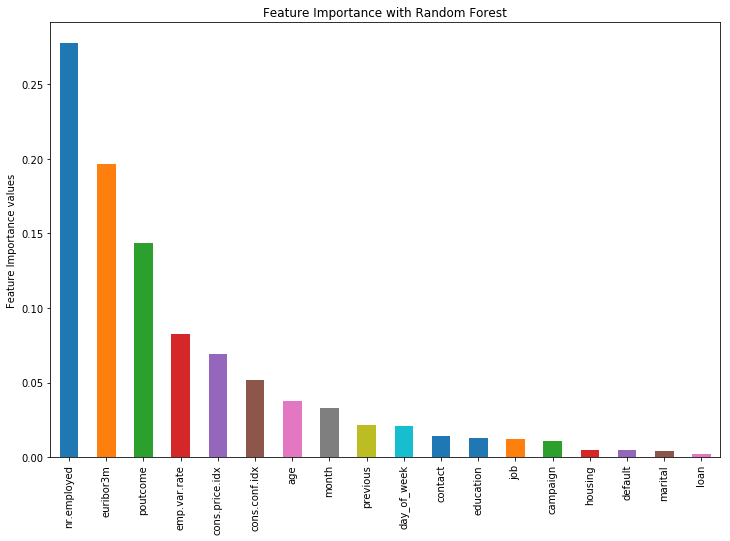

In [24]:
rf = RandomForestClassifier(max_depth=15,n_estimators=70, min_samples_leaf=50,\
                                  min_samples_split=100, random_state=10)

rf.fit(X_train,y_train)

imp_feat_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feat_rf[:19].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')

In [25]:
pred=pd.DataFrame(rf.predict(X_test))

#### Label encoding the categorical features 

For this purpose we have to convert our string features to number, because machine learning algorithms can only understand the numeric values, unless we are working with natural language processing. Therefore, we are going to convert our features to numeric values by using Label encoder function from sklearn library. 

For this particular project we are going to use tree based machine learning algorithms, hence we do not need to use one hot encoder or dummy variable in order to not increase the dimensionality of the data set. Let's move forward.